In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Bitcoin.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2678,2022-01-16,43172.039063,43436.808594,42691.023438,43113.878906,43113.878906,17902097845
2679,2022-01-17,43118.121094,43179.390625,41680.320313,42250.550781,42250.550781,21690904261
2680,2022-01-18,42250.074219,42534.402344,41392.214844,42375.632813,42375.632813,22417209227
2681,2022-01-19,42374.039063,42478.304688,41242.914063,41744.328125,41744.328125,23091543258


In [5]:
dr = df.reset_index()['Close']

In [6]:
dr.shape

(2683,)

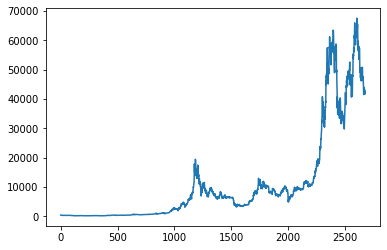

In [7]:
plt.plot(dr)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dr1 =scaler.fit_transform(np.array(dr).reshape(-1, 1))

In [10]:
dr1.shape

(2683, 1)

# Splitting Dataset Into Train test split

In [12]:
training_size = int(len(dr1)*0.65)
test_size= len(dr1)- training_size
train_data,test_data = dr1[0:training_size, :], dr1[training_size:len(dr1), :1]

In [18]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)- time_step-1):
        a= dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t, t+1, t+2, t+3, and Y= t+4
time_step = 100
X_train,Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [21]:
X_train.shape

(1642, 100)

In [22]:
#reshape the input to be [samples, time steps, features] which is required for LTSM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [24]:
X_train.shape, X_test.shape

((1642, 100, 1), (839, 100, 1))

In [25]:
# Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train, validation_data =(X_test,Y_test), epochs=100, batch_size=64, verbose=1)

Train on 1642 samples, validate on 839 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1642/1642 [==============================] - 35s 21ms/sample - loss: 0.0015 - val_loss: 0.0120
Epoch 2/100
1642/1642 [==============================] - 23s 14ms/sample - loss: 2.1289e-04 - val_loss: 0.0085
Epoch 3/100
1642/1642 [==============================] - 36s 22ms/sample - loss: 1.4430e-04 - val_loss: 0.0046
Epoch 4/100
1642/1642 [==============================] - 28s 17ms/sample - loss: 1.2183e-04 - val_loss: 0.0056
Epoch 5/100
1642/1642 [==============================] - 22s 14ms/sample - loss: 1.1018e-04 - val_loss: 0.0051
Epoch 6/100
1642/1642 [==============================] - 23s 14ms/sample - loss: 1.0115e-04 - val_loss: 0.0091
Epoch 7/100
1642/1642 [==============================] - 23s 14ms/sample - loss: 9.3030e-05 - val_loss: 0.0121
Epoch 8/100
1642/1642 [==============================] - 23s 14ms/sample - loss: 9.544